Training/validation/testing sets in scikit-learn

In scikit-learn, train_test_split() divides a set of input features, X, and output features, y, into a training/testing split. Four dataframes are returned in a specific order: X_train, X_test, y_train, and y_test. To create a training/validation/testing split, use train_test_split() twice: once to create a training set and testing set, and again to split the training data into training and validation sets. Useful parameters are described in the following table. Additional details can be found in the scikit-learn documentation.

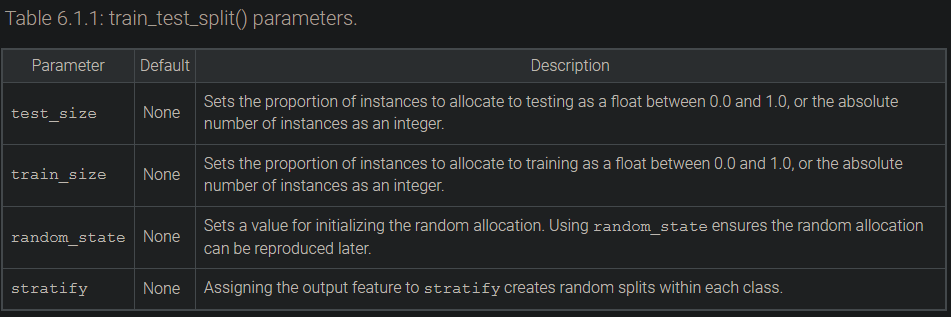

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
wine = pd.read_csv('wine_sample.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,10.0,0.46,0.44,2.9,0.065,4.0,8,0.99674,3.33,0.62,12.2,6,red
1,9.5,0.57,0.27,2.3,0.082,23.0,144,0.99782,3.27,0.55,9.4,5,red
2,7.3,0.91,0.10,1.8,0.074,20.0,56,0.99672,3.35,0.56,9.2,5,red
3,8.2,0.23,0.42,1.9,0.069,9.0,17,0.99376,3.21,0.54,12.3,6,red
4,7.9,0.37,0.23,1.8,0.077,23.0,49,0.99630,3.28,0.67,9.3,5,red


In [8]:
X = wine[['density', 'alcohol']]
y = wine[['type']]

# Set aside 10% of instances for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                    random_state=123, stratify=y)

# Split training again into 80% training and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1/(1-0.1), 
                                                  random_state=124, stratify=y_train)
#Using stratify=y randomly assigns instances to training/testing within each output class, resulting in splits with equal class proportions.

In [10]:
print('Instances in training:', len(X_train))
print('Instances in validation:', len(X_val))
print('Instances in testing:', len(X_test))

Instances in training: 160
Instances in validation: 20
Instances in testing: 20


Text(0.5, 1.0, 'Training set')

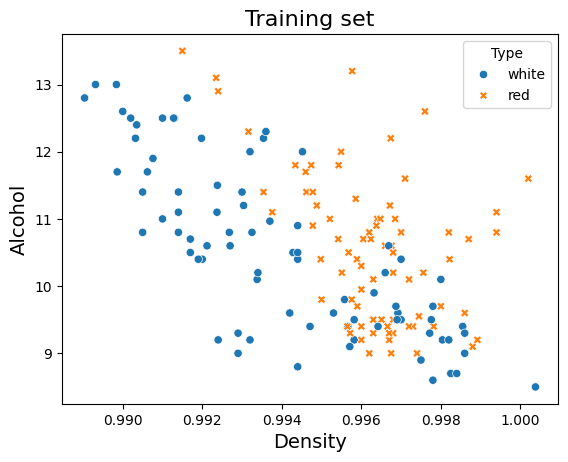

In [11]:
# Plot training set
p = sns.scatterplot(x=X_train['density'], y=X_train['alcohol'], hue=np.ravel(y_train), 
                    style=np.ravel(y_train))
p.set_xlabel('Density', fontsize=14)
p.set_ylabel('Alcohol', fontsize=14)
plt.legend(title='Type')
plt.title('Training set', fontsize=16)

Text(0.5, 1.0, 'Validation set')

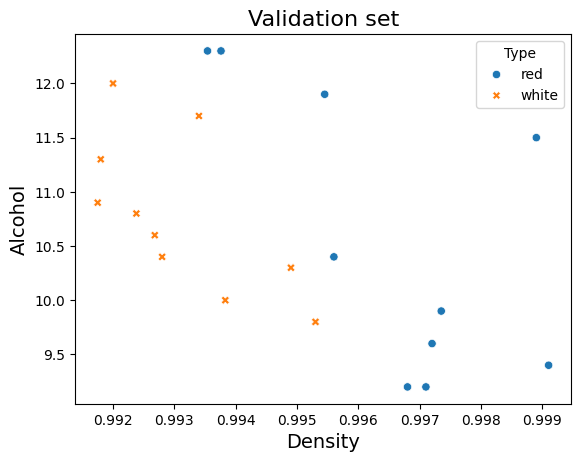

In [12]:
# Plot validation set
p = sns.scatterplot(x=X_val['density'], y=X_val['alcohol'], hue=np.ravel(y_val), 
                    style=np.ravel(y_val))
p.set_xlabel('Density', fontsize=14)
p.set_ylabel('Alcohol', fontsize=14)
plt.legend(title='Type')
plt.title('Validation set', fontsize=16)

Text(0.5, 1.0, 'Testing set')

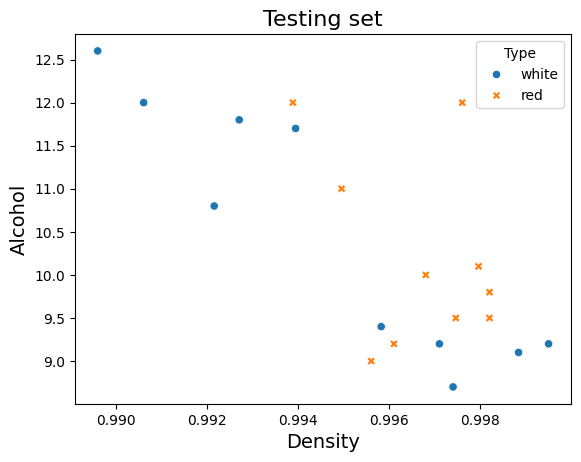

In [13]:
# Plot testing set
p = sns.scatterplot(x=X_test['density'], y=X_test['alcohol'], hue=np.ravel(y_test), 
                    style=np.ravel(y_test))
p.set_xlabel('Density', fontsize=14)
p.set_ylabel('Alcohol', fontsize=14)
plt.legend(title='Type')
plt.title('Testing set', fontsize=16)